In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('dataset/')

In [3]:
import glob
glob.glob('*.csv')

['application_record.csv', 'credit_record.csv']

In [4]:
dfs = {}

for i in glob.glob('*.csv'):
    dfs[i[:-4]] = pd.read_csv(i)
    
for i in dfs.keys():
    dfs[i].columns = [j.lower() for j in dfs[i].columns]

In [ ]:
dfs.keys()

In [5]:
dfs['application_record'].head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
dfs['credit_record'].head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
df = pd.merge(dfs['application_record'], dfs['credit_record'], on = 'id', how = 'inner')
df.shape

(777715, 20)

# Preprocessing

In [8]:
df.isna().sum()

id                          0
code_gender                 0
flag_own_car                0
flag_own_realty             0
cnt_children                0
amt_income_total            0
name_income_type            0
name_education_type         0
name_family_status          0
name_housing_type           0
days_birth                  0
days_employed               0
flag_mobil                  0
flag_work_phone             0
flag_phone                  0
flag_email                  0
occupation_type        240048
cnt_fam_members             0
months_balance              0
status                      0
dtype: int64

In [9]:
df.id.nunique()

36457

In [10]:
df['id'].value_counts()

id
5090630    61
5148524    61
5066707    61
5061848    61
5118380    61
           ..
5024557     1
5062311     1
5024365     1
5024364     1
5041568     1
Name: count, Length: 36457, dtype: int64

In [11]:
df[df['id'] == 5090630].head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
452126,5090630,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19983,365243,1,0,0,1,NaN,2.0,0,X
452127,5090630,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19983,365243,1,0,0,1,NaN,2.0,-1,X
452128,5090630,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19983,365243,1,0,0,1,NaN,2.0,-2,X
452129,5090630,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19983,365243,1,0,0,1,NaN,2.0,-3,X
452130,5090630,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19983,365243,1,0,0,1,NaN,2.0,-4,X


In [12]:
df[df['id'] == 5090630]['occupation_type'].isna().sum()

61

In [13]:
for cols in df.columns:
    print(f'{cols} :: {df[cols].unique()}')

id :: [5008804 5008805 5008806 ... 5149838 5150049 5150337]
code_gender :: ['M' 'F']
flag_own_car :: ['Y' 'N']
flag_own_realty :: ['Y' 'N']
cnt_children :: [ 0  1  3  2  4  5 14 19  7]
amt_income_total :: [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630

In [14]:
cols_with_2_unique_val = []

for cols in df.columns:
    if df[cols].nunique() == 2:
        cols_with_2_unique_val.append(cols)
        
df1 = df.drop(columns = cols_with_2_unique_val)
df2 = df[cols_with_2_unique_val]
df2 = pd.get_dummies(df2)

In [15]:
df1.head()

,id,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,occupation_type,cnt_fam_members,months_balance,status
0,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0,0,C
1,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0,-1,C
2,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0,-2,C
3,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0,-3,C
4,5008804,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,NaN,2.0,-4,C


In [16]:
df1.columns

Index(['id', 'cnt_children', 'amt_income_total', 'name_income_type',
       'name_education_type', 'name_family_status', 'name_housing_type',
       'days_birth', 'days_employed', 'flag_mobil', 'occupation_type',
       'cnt_fam_members', 'months_balance', 'status'],
      dtype='object')

    days_birth days_employed

In [17]:
df1.days_birth.describe()

count    777715.000000
mean     -16124.937046
std        4104.304018
min      -25152.000000
25%      -19453.000000
50%      -15760.000000
75%      -12716.000000
max       -7489.000000
Name: days_birth, dtype: float64

In [18]:
df1.days_employed.describe()

count    777715.000000
mean      57775.825016
std      136471.735391
min      -15713.000000
25%       -3292.000000
50%       -1682.000000
75%        -431.000000
max      365243.000000
Name: days_employed, dtype: float64

In [19]:
df1['days_birth'] = round((abs(df1['days_birth'])/365),2)
df1['days_employed'] = round((abs(df1['days_employed'])/365),2)

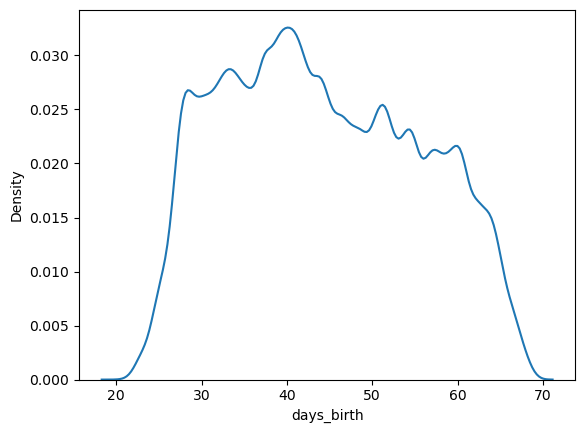

In [20]:
sns.kdeplot(df1['days_birth'])
plt.show()

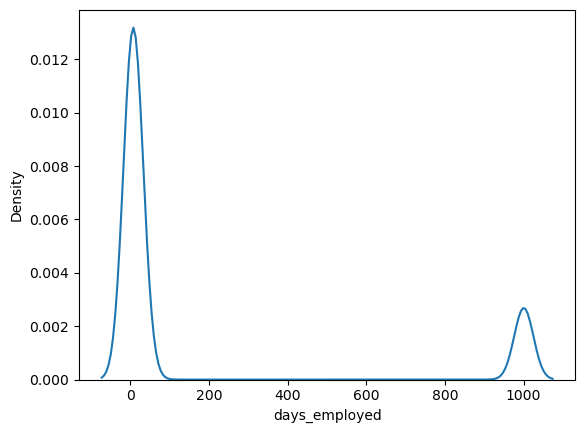

In [21]:
sns.kdeplot(df1['days_employed'])
plt.show()

In [22]:
df1.loc[df1.days_employed > 44,'days_employed'] = 0

In [23]:
df1['name_income_type'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [24]:
df1.groupby('name_income_type').amt_income_total.mean()

name_income_type
Commercial associate    220143.080666
Pensioner               147600.830870
State servant           202292.128841
Student                 164537.091988
Working                 184953.668583
Name: amt_income_total, dtype: float64

In [25]:
def name_income(x):
    if x == 'Commercial associate':
        return 5
    elif x == 'State servant':
        return 4
    elif x == 'Working':
        return 3
    elif x == 'Student':
        return 2
    elif x == 'Pensioner':
        return 1
    
df1['name_income_type'] = df1['name_income_type'].apply(name_income)

In [26]:
df1['name_education_type'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [27]:
new = pd.DataFrame()
new = df1.groupby(['name_income_type','name_education_type']).amt_income_total.mean().reset_index()
new

,name_income_type,name_education_type,amt_income_total
0,1,Academic degree,450000.000000
1,1,Higher education,171270.500179
2,1,Incomplete higher,152610.198183
3,1,Lower secondary,99041.652249
4,1,Secondary / secondary special,143939.231202
5,2,Higher education,169252.427184
6,2,Secondary / secondary special,112500.000000
7,3,Academic degree,224941.558442
8,3,Higher education,213867.331120
9,3,Incomplete higher,204096.409918


In [28]:
new = new.sort_values('amt_income_total')
new['order'] = [x for x in range(1,new.shape[0]+1)]
new

,name_income_type,name_education_type,amt_income_total,order
3,1,Lower secondary,99041.652249,1
6,2,Secondary / secondary special,112500.000000,2
14,4,Lower secondary,136466.772152,3
4,1,Secondary / secondary special,143939.231202,4
2,1,Incomplete higher,152610.198183,5
19,5,Lower secondary,164067.243675,6
5,2,Higher education,169252.427184,7
1,1,Higher education,171270.500179,8
11,3,Secondary / secondary special,173809.552359,9
10,3,Lower secondary,177082.208738,10


In [29]:
new.drop(columns = ['amt_income_total'], inplace = True)

In [30]:
df3 = df1.copy()

df3 = pd.merge(new, df3, on = ['name_income_type', 'name_education_type'], how = 'inner')

In [31]:
df['name_housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [32]:
def name_housing(x):
    if x == 'Rented apartment':
        return 1
    elif x == 'House / apartment':
        return 6
    elif x == 'Municipal apartment':
        return 1
    elif x == 'With parents':
        return 5
    elif x == 'Co-op apartment':
        return 1
    elif x == 'Office apartment':
        return 5
    
df3['name_housing_type'] = df3['name_housing_type'].apply(name_housing)

In [33]:
df3['name_family_status'].unique()

array(['Married', 'Civil marriage', 'Single / not married', 'Widow',
       'Separated'], dtype=object)

In [34]:
df3.groupby('name_family_status').amt_income_total.mean()

name_family_status
Civil marriage          180838.356220
Married                 189276.531145
Separated               194441.448823
Single / not married    192433.081937
Widow                   170049.569214
Name: amt_income_total, dtype: float64

In [35]:
def name_family(x):
    if x == 'Separated':
        return 5
    elif x == 'Single / not married':
        return 4
    elif x == 'Married':
        return 3
    elif x == 'Civil marriage':
        return 2
    elif x == 'Widow':
        return 1
    
df3['name_family_status'] = df3['name_family_status'].apply(name_family)

In [36]:
df_occ = df3.groupby('occupation_type').amt_income_total.agg(['mean','count','std']).reset_index()
df_occ = df_occ.sort_values('count', ascending = False)

In [37]:
df_occ['SE'] = df_occ['std']/np.sqrt(df_occ['count'])
df_occ

,occupation_type,mean,count,std,SE
8,Laborers,181708.198933,131572,75051.141797,206.907182
3,Core staff,191917.622899,77112,99916.338784,359.811905
14,Sales staff,174878.410271,70362,85175.760127,321.104898
10,Managers,281713.995985,67738,157525.557489,605.250059
4,Drivers,208968.926968,47678,85034.588613,389.436452
6,High skill tech staff,197953.892282,31768,95162.304853,533.912410
0,Accountants,207761.509661,27223,106968.915457,648.320271
11,Medicine staff,167347.387546,26691,77380.226951,473.639132
2,Cooking staff,144189.411896,13416,66338.321743,572.733987
16,Security staff,177341.370968,12400,92622.741690,831.776775


In [38]:
df_occ['lower_lmt'] = df_occ['mean'] - (1.96*df_occ['SE'])
df_occ['upper_lmt'] = df_occ['mean'] + (1.96*df_occ['SE'])

In [39]:
for i, j, k in zip(df_occ.occupation_type, df_occ.lower_lmt, df_occ.upper_lmt):
    df3.loc[(df3['occupation_type'].isna())|((df3['amt_income_total'] >= j)&(df3['amt_income_total'] <= k)), 'occupation_type'] = i

In [40]:
df3.isna().sum()

name_income_type       0
name_education_type    0
order                  0
id                     0
cnt_children           0
amt_income_total       0
name_family_status     0
name_housing_type      0
days_birth             0
days_employed          0
flag_mobil             0
occupation_type        0
cnt_fam_members        0
months_balance         0
status                 0
dtype: int64

In [41]:
df3.drop('name_education_type', axis = 1, inplace=True)
df3 = df3.rename(columns={'order': 'order_name_education_type'})

In [42]:
df3.drop('flag_mobil', axis = 1, inplace=True)

In [43]:
df_occ.sort_values('mean', inplace=True)

In [44]:
df_occ['occupation_type_code'] = [i for i in range(1, df_occ.shape[0]+1)]
df_occ

,occupation_type,mean,count,std,SE,lower_lmt,upper_lmt,occupation_type_code
9,Low-skill Laborers,127543.886282,3623,53901.581228,895.503605,125788.699216,129299.073348,1
2,Cooking staff,144189.411896,13416,66338.321743,572.733987,143066.853282,145311.970511,2
1,Cleaning staff,149095.947013,11399,62926.462792,589.386173,147940.750114,150251.143912,3
17,Waiters/barmen staff,153756.746187,2557,63910.528337,1263.883499,151279.534529,156233.957845,4
15,Secretaries,163206.097174,3149,69735.740170,1242.707972,160770.389548,165641.804800,5
11,Medicine staff,167347.387546,26691,77380.226951,473.639132,166419.054848,168275.720245,6
14,Sales staff,174878.410271,70362,85175.760127,321.104898,174249.044671,175507.775871,7
16,Security staff,177341.370968,12400,92622.741690,831.776775,175711.088489,178971.653446,8
8,Laborers,181708.198933,131572,75051.141797,206.907182,181302.660856,182113.737009,9
3,Core staff,191917.622899,77112,99916.338784,359.811905,191212.391566,192622.854232,10


In [45]:
final_df = pd.concat([df3, df2], axis = 1)

In [46]:
final_df = pd.merge(final_df,df_occ[['occupation_type', 'occupation_type_code']],on = 'occupation_type', how = 'inner')

In [47]:
final_df.drop('occupation_type', axis = 1, inplace=True)

In [48]:
from sklearn.preprocessing import *
from sklearn.cluster import KMeans

In [49]:
final_df.isna().sum()

name_income_type             0
order_name_education_type    0
id                           0
cnt_children                 0
amt_income_total             0
name_family_status           0
name_housing_type            0
days_birth                   0
days_employed                0
cnt_fam_members              0
months_balance               0
status                       0
flag_work_phone              0
flag_phone                   0
flag_email                   0
code_gender_F                0
code_gender_M                0
flag_own_car_N               0
flag_own_car_Y               0
flag_own_realty_N            0
flag_own_realty_Y            0
occupation_type_code         0
dtype: int64

In [50]:
X1 = final_df.drop(['id','status'], axis = 1)
y1 = final_df[['status']]

In [51]:
scaler = MinMaxScaler()
scaler.fit(X1)
scaled_df = scaler.transform(X1)

In [52]:
import warnings
import matplotlib.pyplot as plt


wcss = []

for i in (range(1, 6)):
    warnings.filterwarnings('ignore')
    kmean_model = KMeans(n_clusters = i)
    kmean_model.fit(scaled_df)
    wcss.append(kmean_model.inertia_)

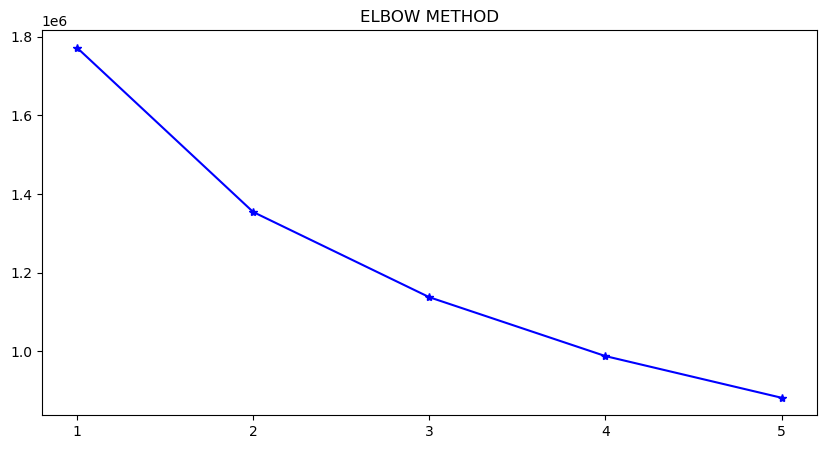

In [54]:
plt.figure(figsize=(10,5))
plt.plot(range(1,6,1), wcss,color = 'blue', marker = '*')
plt.title('ELBOW METHOD')
plt.xticks(range(1, 6))  # Setting x-axis ticks
plt.show()

In [55]:
km = KMeans(n_clusters=2)
km.fit(scaled_df)

final_df['cluster_label'] = km.labels_

In [56]:
final_df.head()

,name_income_type,order_name_education_type,id,cnt_children,amt_income_total,name_family_status,name_housing_type,days_birth,days_employed,cnt_fam_members,...,flag_phone,flag_email,code_gender_F,code_gender_M,flag_own_car_N,flag_own_car_Y,flag_own_realty_N,flag_own_realty_Y,occupation_type_code,cluster_label
0,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,...,0,0,False,True,False,True,False,True,9,0
1,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,...,0,0,False,True,False,True,False,True,9,0
2,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,...,0,0,False,True,False,True,False,True,9,0
3,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,...,0,0,False,True,False,True,False,True,9,0
4,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,...,0,0,False,True,False,True,False,True,9,0


In [57]:
temp = pd.DataFrame(final_df.groupby('cluster_label')['status'].value_counts())

In [58]:
temp.columns = ['count']
temp

count
cluster_label status        
0             C       127426
              0       115099
              X        57326
              1         3407
              5          594
              2          304
              3          122
              4           82
1             C       202110
              0       175555
              X        88624
              1         5340
              5          933
              2          497
              3          164
              4          132

In [60]:
df3.groupby(final_df['cluster_label'])['occupation_type'].value_counts()

cluster_label  occupation_type      
0              Laborers                 115739
               IT staff                  25669
               Core staff                23749
               HR staff                  22370
               Sales staff               22292
               Managers                  22139
               Drivers                   13395
               Medicine staff            11082
               Cooking staff              8783
               High skill tech staff      8273
               Accountants                8204
               Low-skill Laborers         5614
               Cleaning staff             4515
               Security staff             4457
               Private service staff      2942
               Secretaries                2260
               Waiters/barmen staff       2133
               Realty agents               744
1              Laborers                 180034
               IT staff                  38025
               Sales st

In [61]:
final_df.loc[(final_df['status']=='X')|
        (final_df['status']=='C')|
        (final_df['status']=='0'),'response'] = 1
final_df.loc[(final_df['status']=='1')|
        (final_df['status']=='2')|
        (final_df['status']=='3')|
        (final_df['status']=='4')|
        (final_df['status']=='5'),'response'] = 0

In [62]:
final_df.response.value_counts()/final_df.shape[0]*100

response
1.0    98.511666
0.0     1.488334
Name: count, dtype: float64

In [63]:
temp1 = final_df.drop(columns=['status'])
from scipy.stats import pointbiserialr

In [64]:
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
result_df = pd.DataFrame()
result_point = []
var1 = []
var2 = []
for i in temp1.columns:
    if i == 'response':
        continue
    elif temp1[i].nunique() >= 10:
        point = pointbiserialr(temp1[i],temp1['response'])
        if point[1]<0.05:
            result_point.append('significant')
            var1.append(i)
            var2.append('response')
        else:
            result_point.append('insignificant')
    elif temp1[i].nunique() <10:
        cross = pd.crosstab(temp1[i],temp1['response'])
        chi2 = chi2_contingency(cross)
        var1.append(i)
        var2.append('response')
        if chi2[1] <0.05:
            result_point.append('significant')
        else:
            result_point.append('insignificant')
result_df['var1'] = var1
result_df['var2'] = var2
result_df['result_point'] = result_point
result_df



,var1,var2,result_point
0,name_income_type,response,significant
1,order_name_education_type,response,significant
2,id,response,significant
3,cnt_children,response,significant
4,amt_income_total,response,significant
5,name_family_status,response,significant
6,name_housing_type,response,significant
7,days_birth,response,significant
8,days_employed,response,significant
9,cnt_fam_members,response,significant


In [65]:
un_wanted = result_df[result_df['result_point']=='insignificant'].var1.to_list()

In [71]:
model_df  = final_df.drop(columns=un_wanted, axis=1)

In [72]:
model_df['months_balance'] = abs(model_df['months_balance'])

In [78]:
model_df.columns

Index(['name_income_type', 'order_name_education_type', 'id', 'cnt_children',
       'amt_income_total', 'name_family_status', 'name_housing_type',
       'days_birth', 'days_employed', 'cnt_fam_members', 'months_balance',
       'status', 'code_gender_F', 'code_gender_M', 'flag_own_realty_N',
       'flag_own_realty_Y', 'occupation_type_code', 'response'],
      dtype='object')

In [80]:
model_df.head()

,name_income_type,order_name_education_type,id,cnt_children,amt_income_total,name_family_status,name_housing_type,days_birth,days_employed,cnt_fam_members,months_balance,status,code_gender_F,code_gender_M,flag_own_realty_N,flag_own_realty_Y,occupation_type_code,response
0,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,0,X,False,True,False,True,9,1.0
1,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,1,X,False,True,False,True,9,1.0
2,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,2,X,False,True,False,True,9,1.0
3,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,3,X,False,True,False,True,9,1.0
4,1,1,5010848,0,54000.0,3,6,61.03,0.0,2.0,4,X,False,True,False,True,9,1.0


In [81]:
model_df.drop('status', axis= 1, inplace=True)

In [85]:
os.chdir('/')

In [86]:
model_df.to_csv('cleaned_df.csv')